In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [4]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.319097,-0.804526,0.225308,0.191835,-0.274806,1
1,-2.556240,-1.975628,-3.127391,-0.113787,0.375547,0
2,-1.292123,0.839665,-0.316848,1.253616,0.037699,0
3,0.599899,-1.097293,1.758932,-2.093930,-1.004695,1
4,-1.116802,0.226841,-2.186217,-0.233223,0.820821,0


In [5]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [9]:
import random  # Import the random module

# function for feature sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1] - 1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df


In [10]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [11]:
df1 = combined_sampling(df,0.5,0.5)


C:\Users\princ\AppData\Local\Temp\ipykernel_5376\1043666310.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
df2 = combined_sampling(df,0.5,0.5)


C:\Users\princ\AppData\Local\Temp\ipykernel_5376\1043666310.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [13]:
df3 = combined_sampling(df,0.5,0.5)


C:\Users\princ\AppData\Local\Temp\ipykernel_5376\1043666310.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [14]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'target'], dtype='object')
Index(['col1', 'col4', 'target'], dtype='object')
Index(['col1', 'col4', 'target'], dtype='object')


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [16]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [17]:
from sklearn.tree import plot_tree

[Text(0.38095238095238093, 0.9285714285714286, 'x[1] <= -1.744\ngini = 0.461\nsamples = 50\nvalue = [18, 32]'),
 Text(0.19047619047619047, 0.7857142857142857, 'x[1] <= -2.098\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.14285714285714285, 0.6428571428571429, 'x[0] <= -0.542\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.09523809523809523, 0.5, 'x[1] <= -3.766\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.047619047619047616, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14285714285714285, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.19047619047619047, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.23809523809523808, 0.6428571428571429, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5714285714285714, 0.7857142857142857, 'x[1] <= 0.026\ngini = 0.405\nsamples = 39\nvalue = [11, 28]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[0] <= -2.297\ngini = 0.252\nsamples = 27\nvalue = [4, 23]'),
 Tex

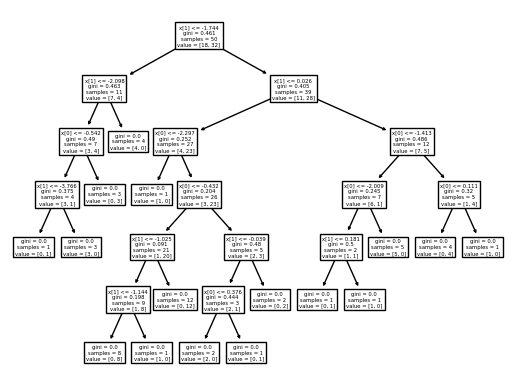

In [18]:
plot_tree(clf1)

[Text(0.4166666666666667, 0.9583333333333334, 'x[1] <= -0.31\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.25, 0.875, 'x[0] <= -0.196\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.16666666666666666, 0.7916666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.7916666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5833333333333334, 0.875, 'x[0] <= 0.006\ngini = 0.467\nsamples = 43\nvalue = [27, 16]'),
 Text(0.5, 0.7916666666666666, 'x[0] <= -0.111\ngini = 0.491\nsamples = 37\nvalue = [21, 16]'),
 Text(0.4166666666666667, 0.7083333333333334, 'x[0] <= -1.435\ngini = 0.472\nsamples = 34\nvalue = [21, 13]'),
 Text(0.16666666666666666, 0.625, 'x[0] <= -2.522\ngini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.08333333333333333, 0.5416666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.5416666666666666, 'x[1] <= 1.754\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.16666666666666666, 0.4583333333333

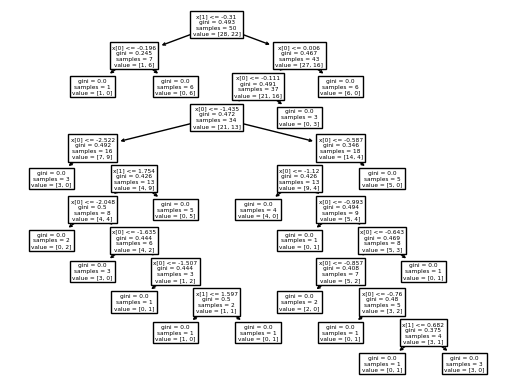

In [19]:
plot_tree(clf2)


[Text(0.4625, 0.95, 'x[0] <= -1.393\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.25, 0.85, 'x[0] <= -1.523\ngini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(0.2, 0.75, 'x[0] <= -1.914\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.1, 0.65, 'x[1] <= 0.881\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3, 0.65, 'x[0] <= -1.707\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.25, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.35, 0.55, 'x[0] <= -1.594\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.3, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.675, 0.85, 'x[1] <= -0.265\ngini = 0.438\nsamples = 37\nvalue = [25, 12]'),
 Text(0.55, 0.75, 'x[0] <= 0.111\ngini = 0.469\nsamples = 8\nvalue 

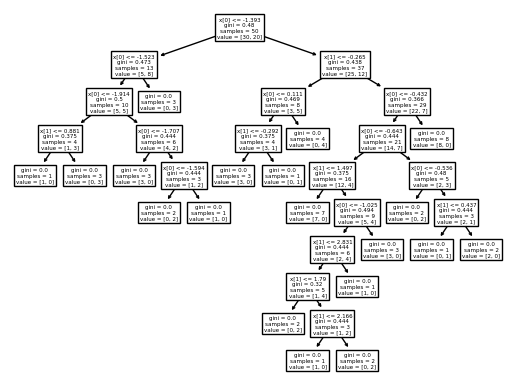

In [20]:
plot_tree(clf3)


In [21]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\princ\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [22]:
df.sample(14,replace=True)


,col1,col2,col3,col4,col5,target
82,-1.299462,0.848116,-0.538001,-0.243419,-0.826927,1
34,-0.642521,-0.383175,-0.310692,0.250134,-0.471717,1
96,-2.168776,-0.396758,1.308020,1.840324,-1.382226,1
21,-3.041160,1.648827,-0.979243,2.194930,-1.822020,0
4,-1.116802,0.226841,-2.186217,-0.233223,0.820821,0
17,-1.677211,-1.337527,0.431094,2.217309,-0.932961,1
66,-1.616469,-1.463654,0.798099,1.825904,-0.975494,1
14,0.800030,-1.383978,2.250997,-0.655693,-0.636915,1
44,-0.808448,-1.347533,1.786986,0.868532,-1.350363,1
63,1.422818,-4.224910,-0.283951,0.556905,4.368379,0
